<a href="https://colab.research.google.com/github/souha819/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/Copy_of_iml_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning - Exercise 4
Goal of the excercise is to learn how to use Scikit-learn library for a regression tasks employing various linear regression models and moreover evaluate the performance of the proposed models.

![meme01](https://github.com/rasvob/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_10_meme_01.jpeg?raw=true)

## 📌 Useful URLs

### Models
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

### Preprocessing
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

In [ ]:
"""
Computes MAPE
"""
def mean_absolute_percentage_error(y_true: np.array, y_pred: np.array) -> float:
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def compute_metrics(df: pd.DataFrame) -> pd.DataFrame:
    y_true, y_pred = df['y_true'].values, df['y_pred'].values
    return compute_metrics_raw(y_true, y_pred)

def compute_metrics_raw(y_true: pd.Series, y_pred: pd.Series) -> pd.DataFrame:
    mae, mse, rmse, mape = mean_absolute_error(y_true=y_true, y_pred=y_pred), mean_squared_error(y_true=y_true, y_pred=y_pred), np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred)), mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    return pd.DataFrame.from_records([{'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape}], index=[0])

## Petrol Consumption Dataset
https://www.kaggle.com/datasets/harinir/petrol-consumption

### 🎯 Our goal is to build a regression model for prediction of petrol consumption in the 48 USA states.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/EFREI-Introduction-to-Machine-Learning/main/datasets/petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


## Is each column numerical?

In [ ]:
df.dtypes

,0
Petrol_tax,float64
Average_income,int64
Paved_Highways,int64
Population_Driver_licence(%),float64
Petrol_Consumption,int64


## Do we have any missing data?

In [ ]:
df.isna().sum()

,0
Petrol_tax,0
Average_income,0
Paved_Highways,0
Population_Driver_licence(%),0
Petrol_Consumption,0


# 📊 Let's start with a simple EDA

* 🔎 Can you see any relationships among the features from the pairplot?
    * What should we look for?
* 🔎 Do you think that the features are normally distributed?

<Figure size 1200x1200 with 0 Axes>

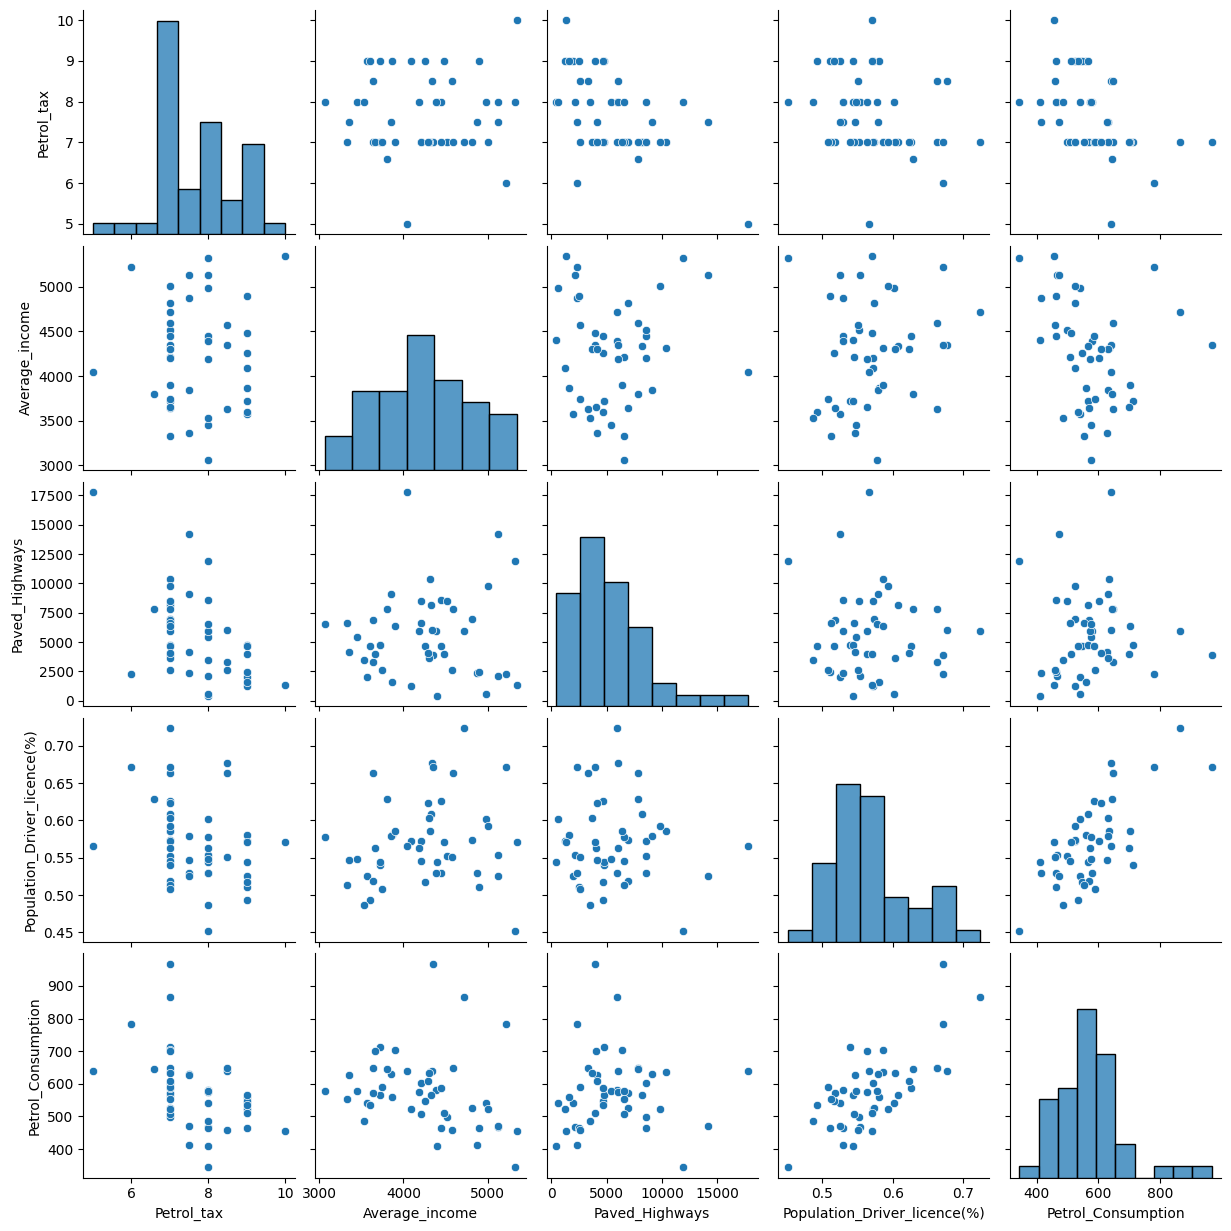

In [ ]:
fig = plt.figure(figsize=(12, 12))
sns.pairplot(df)
fig.show()

## Always look for a simple trend-like patters first 🙂
> ## **Trend is your friend** 😀

![meme02](https://github.com/rasvob/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_10_meme_02.png?raw=true)

## What about the a correlation coefficients?
* 🔎 What row/column is the most important from the heatmap?
    * Why?
* 🔎 Are correlations among **independent variables** good or bad?

<Axes: >

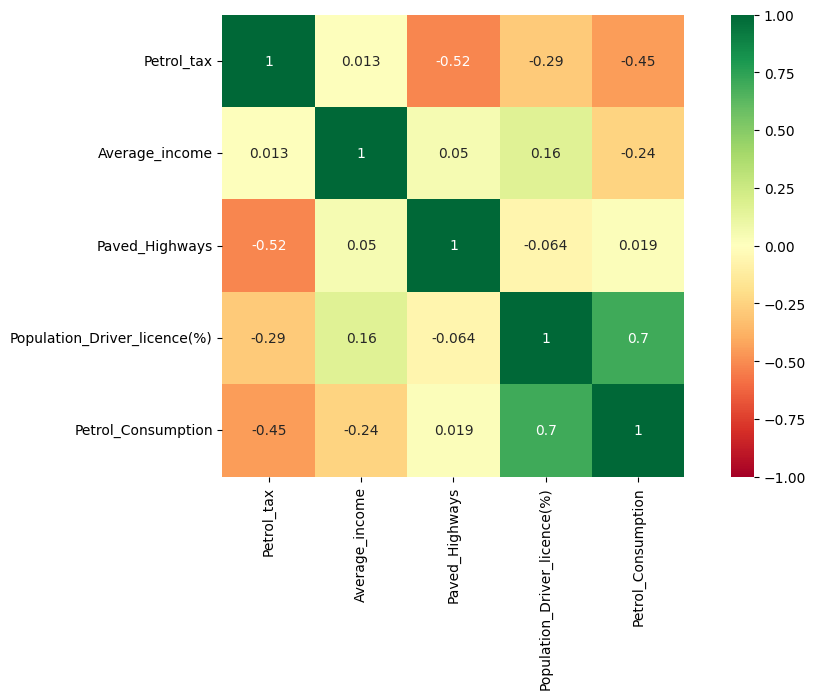

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)

## Can you see any outliers in the data?
* What about skewness or variance differences?

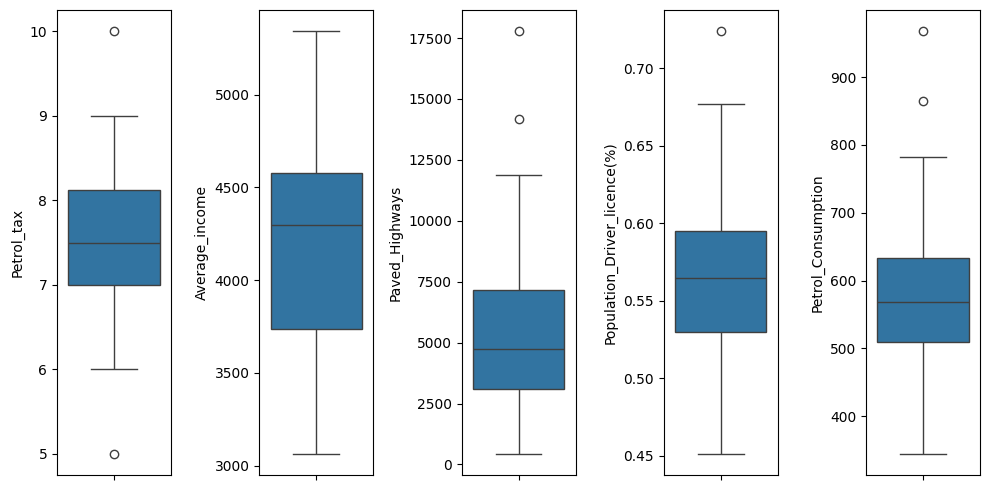

In [ ]:
fig, axes = plt.subplots(1, df.shape[1], figsize=(10, 5))

for i, col in enumerate(df.columns):
    ax = axes.flatten()[i]
    sns.boxplot(data=df, y=col, ax=ax)

fig.tight_layout()

# 🚀 Let's build our first simple regression models with just 2 variables and compare them
* We will split the data into train/test set
* Then we can build the models and evaluate them

### There are many metrics used for the perormance evaluation
* MAE, RMSE, MAPE, R2, etc.
    * Do you know what these abbr. mean?
* 🔎 **Do we want these metrics to go lower or higher?**
    * Is it the same direction as in classification tasks, e.g. F1-Score, or opposite way around?
* 💡 You can take a look at these blog posts:
    * [this](https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914)
    * or [this](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/) for more details

## Create `X` and `y` dataframes

In [ ]:
X,y = df.drop('Petrol_Consumption', axis=1), df['Petrol_Consumption']

In [ ]:
X.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


## Split the data in ration 80:20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
X_train.shape, X_test.shape

((38, 4), (10, 4))

# ⚡ The 1st model will be the simplest one
* We will choose only one feature for the model - *Population_Driver_licence(%)*
    * 🔎 Why did we chose this specific feature?

In [ ]:
alg = LinearRegression()
alg.fit(pd.DataFrame(X_train["Population_Driver_licence(%)"]), y_train)

LinearRegression()

In [ ]:
y_pred = alg.predict(pd.DataFrame(X_test["Population_Driver_licence(%)"]))

## 🔎 How would the regression line formula look like?
* 💡 What is a general equation of straight line in 2D? And for nD?

In [ ]:
alg.coef_

array([1409.6506418])

In [ ]:
alg.intercept_

np.float64(-228.77388463715886)

# 💡 Very simple visual check of prediction quality is `y_test vs. y_pred` scatter plot
* What is an ideal result?

<Axes: xlabel='Petrol_Consumption'>

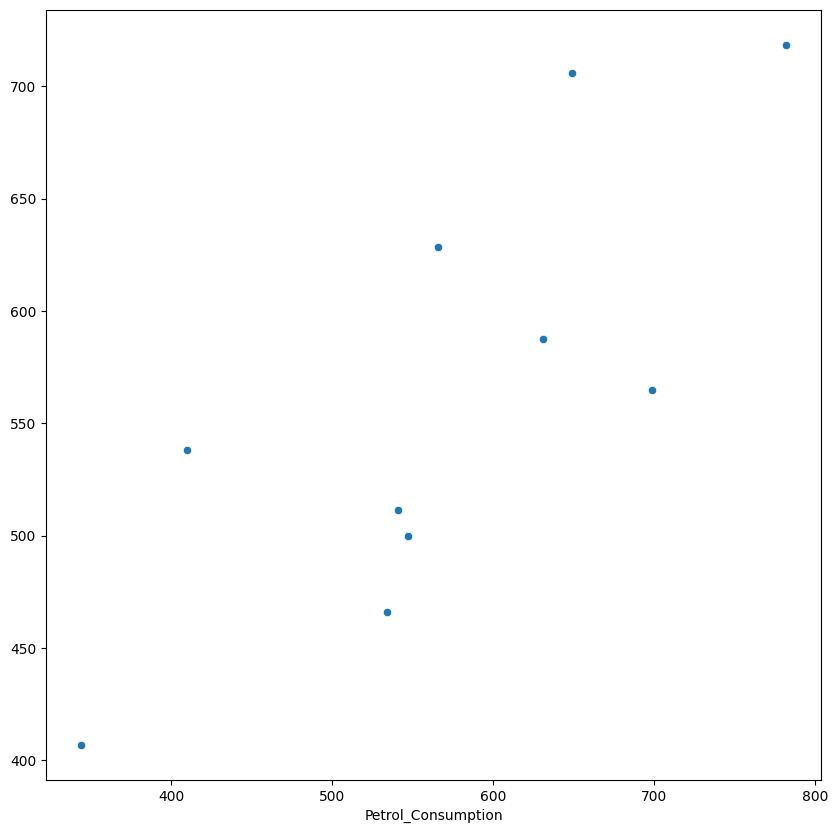

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=y_pred, x=y_test)

# However it is always better to quantify the errors 😊
* 💡MAPE or SMAPE uses percentage values, thus these might be easier to understand to non-expert audience
* 💡MAE, RMSE are in the same units as the predicted variable
    * Always take a look at basic statistical properties (typical value range, variance or use box-plot ) to rationalize the amount of error according to the range or the variable
    * 📌 e.g., MAE = 10 can be low for variable in <1000, 5000> range but very high for variable in <0, 50> range

<Axes: ylabel='Petrol_Consumption'>

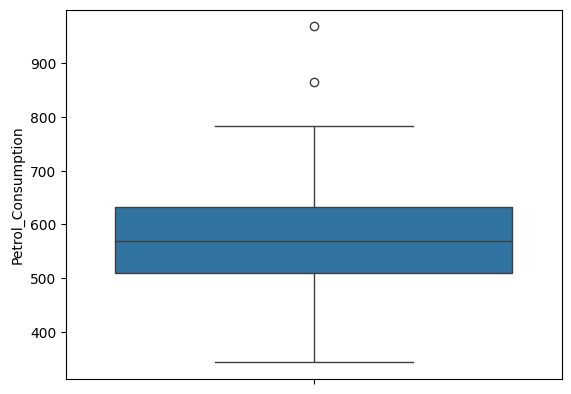

In [ ]:
sns.boxplot(y=y)

## So what do you think about the error?
* 💡 Is model completely off or is it roughly right?

In [ ]:
compute_metrics_raw(y_test, y_pred)

,MAE,MSE,RMSE,MAPE
0,69.589612,5909.265423,76.871747,13.030434


# ⚡ 2nd model will use just one variable again, however now it will be an uncorrelated one
* 🎯 We want to compare the model with the 1st one

In [ ]:
alg = LinearRegression()
alg.fit(pd.DataFrame(X_train["Paved_Highways"]), y_train)
y_pred = alg.predict(pd.DataFrame(X_test["Paved_Highways"]))

## Let's take a look at the scatterplot of y_test vs. y_pred now

<Axes: xlabel='Petrol_Consumption'>

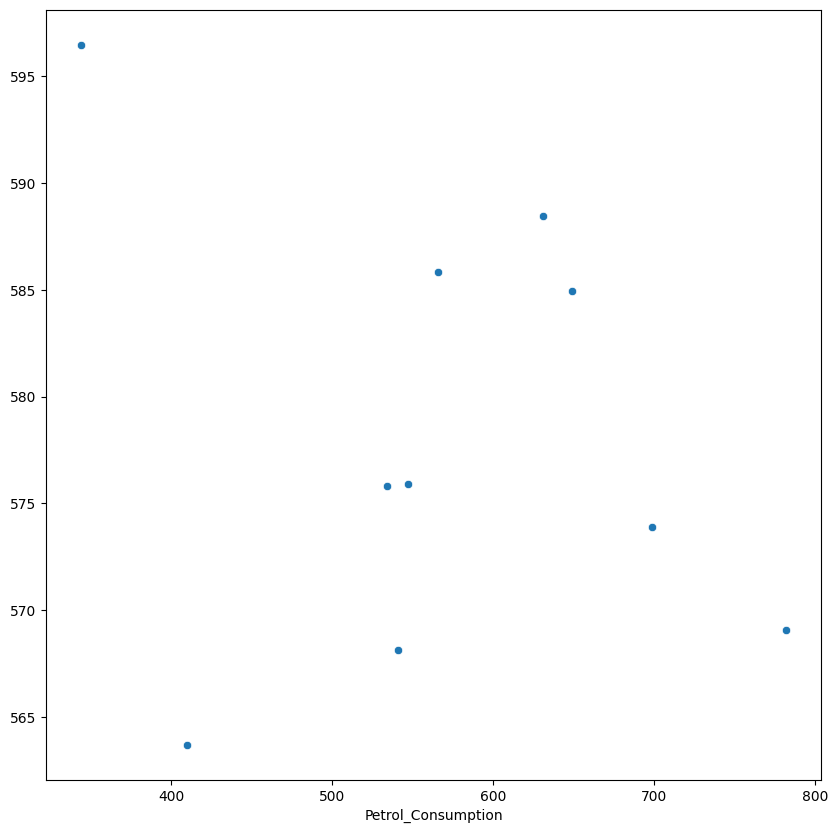

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=y_pred, x=y_test)

## 🔎 Which one of the two models is better and why?

In [ ]:
compute_metrics_raw(y_test, y_pred)

,MAE,MSE,RMSE,MAPE
0,96.856205,15798.747857,125.69307,19.426587


# The obvious next step is using more than one feature in the model, so let's get to it! 👊
* The API is the same, we will just include every feature in the model instead of just one

In [ ]:
alg = LinearRegression()
alg.fit(X_train, y_train)
y_pred = alg.predict(X_test)

## How would the regression line formula look like now?

In [ ]:
alg.coef_

array([-4.02146155e+01, -6.27881489e-02, -3.35821983e-03,  1.42662122e+03])

In [ ]:
alg.intercept_

np.float64(353.4972912944651)

## 📊 For MLR we usually also want to take a look at coefficients values so we can "explain" the decisions by the model
* 🔎 Are all the features used?
* 🔎 Is there any feature much more important than other features?

([0, 1, 2, 3],
 [Text(0, 0, 'Petrol_tax'),
  Text(1, 0, 'Average_income'),
  Text(2, 0, 'Paved_Highways'),
  Text(3, 0, 'Population_Driver_licence(%)')])

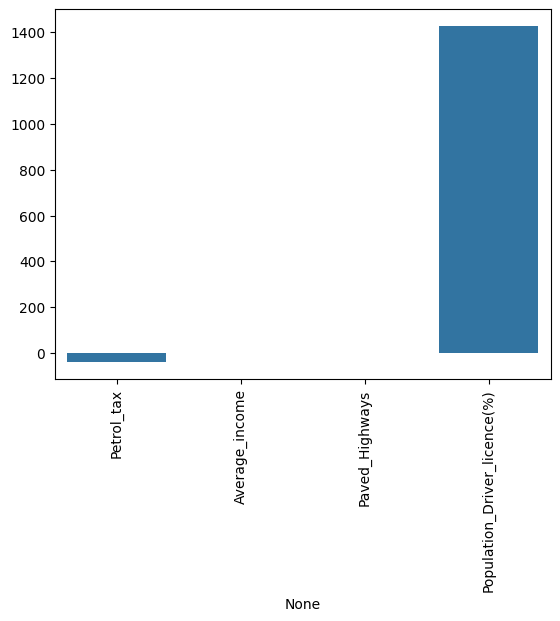

In [ ]:
sns.barplot(x=X_train.columns, y=alg.coef_)
plt.xticks(rotation=90)

## 🔎 Is the model better than the 1st one with just one feature?
* How different are the results?

In [ ]:
compute_metrics_raw(y_test, y_pred)

,MAE,MSE,RMSE,MAPE
0,64.211372,4960.283075,70.429277,12.194036


## 🔎 Is it wise to have a model with some coefficient of few magnitudes higher values than other coefficients?
* What can go wrong?
*  What is a **colinearity?**
    * Why it may become an issue for regression models?

![meme03](https://github.com/rasvob/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_10_meme_03.jpg?raw=true)

# There are method for dealing with of these issues
* It is called regularization
    * We have two types of it - **L1 (Lasso)** and **L2 (Ridge)**
    * What is the difference between them?
* How is the regularization used?
    * What do we change in the model?

* Very nice comparison of both methods is at https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

# Let's try L1 - Lasso first
* 💡 The most important parameter is the `alpha` value
* Higher alpha means that the regularization will be more strict

In [ ]:
alg = Lasso(alpha=2.5, random_state=13)
alg.fit(X_train, y_train)
y_pred = alg.predict(X_test)

## 💡 Notice the values of coefficients

In [ ]:
alg.coef_

array([-4.89752733e+01, -4.76247428e-02, -5.38633958e-03,  4.13509216e+02])

# We can use L2 - Ridge in the same way

([0, 1, 2, 3],
 [Text(0, 0, 'Petrol_tax'),
  Text(1, 0, 'Average_income'),
  Text(2, 0, 'Paved_Highways'),
  Text(3, 0, 'Population_Driver_licence(%)')])

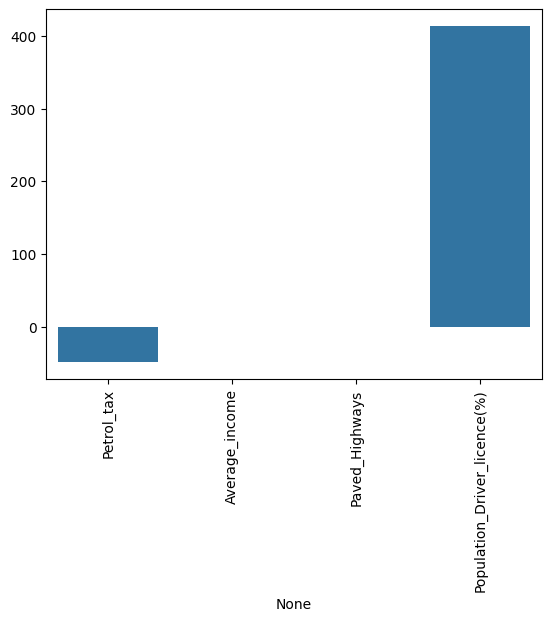

In [ ]:
sns.barplot(x=X_train.columns, y=alg.coef_)
plt.xticks(rotation=90)

### 🔎 Regardless the used model, what is the difference among the coefficients values with enabled and disabled regularization?

# 💡 There are usually differences among the variables ranges
* This may bring some difficulties in the coefficient optimization process
* 💡 If the ranges are similar, the optimization process should be a lot easier
    * Why?
* Due to that, we usually use `MinMaxScaler` or `StandardScaler` before we try to fit a linear regression model
    * We are not limited to these two preprocessing methods

# 🚀 We will try to fit the Lasso model again, but this time with scaled features

### 🔎 Why do we fit the scaler only on the training part of the data?

In [ ]:
compute_metrics_raw(y_test, y_pred)

,MAE,MSE,RMSE,MAPE
0,59.837913,5520.060641,74.297111,11.74413


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MAE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MAE'}, axis=1)
              .sort_values('MAE', ascending=True))
  xs = counted['MAE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('MAE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MAE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MSE'}, axis=1)
              .sort_values('MSE', ascending=True))
  xs = counted['MSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('MSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MSE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['RMSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'RMSE'}, axis=1)
              .sort_values('RMSE', ascending=True))
  xs = counted['RMSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('count()')

### Try 0.1, 1 and 10 for alpha parameter
* What is different for each run?

In [ ]:
results = []

for alpha in [0.1, 1, 10.0 ]:
  alg = Lasso(alpha=2.5, random_state=13)
  alg.fit(X_train, y_train)
  y_pred = alg.predict(X_test)

  results.append((alpha, y_pred, alg.coef_))

In [ ]:
results

[(0.1,
  array([543.41123557, 642.20587305, 569.13179162, 425.25710535,
         606.13688022, 514.34712633, 492.78798328, 587.94462299,
         671.07188641, 618.2003896 ]),
  array([-4.89752733e+01, -4.76247428e-02, -5.38633958e-03,  4.13509216e+02])),
 (1,
  array([543.41123557, 642.20587305, 569.13179162, 425.25710535,
         606.13688022, 514.34712633, 492.78798328, 587.94462299,
         671.07188641, 618.2003896 ]),
  array([-4.89752733e+01, -4.76247428e-02, -5.38633958e-03,  4.13509216e+02])),
 (10.0,
  array([543.41123557, 642.20587305, 569.13179162, 425.25710535,
         606.13688022, 514.34712633, 492.78798328, 587.94462299,
         671.07188641, 618.2003896 ]),
  array([-4.89752733e+01, -4.76247428e-02, -5.38633958e-03,  4.13509216e+02]))]

In [ ]:
df_results = pd.DataFrame(index = [0.1, 1.0, 10.0], columns=['MAE', 'MSE', 'RMSE', 'MAPE'])

for i, x in enumerate(results):
  df_results.iloc[i, :] = compute_metrics_raw(y_test, x[1])

df_results

,MAE,MSE,RMSE,MAPE
0.1,59.837913,5520.060641,74.297111,11.74413
1.0,59.837913,5520.060641,74.297111,11.74413
10.0,59.837913,5520.060641,74.297111,11.74413


## 🔎 How are the models and results different?

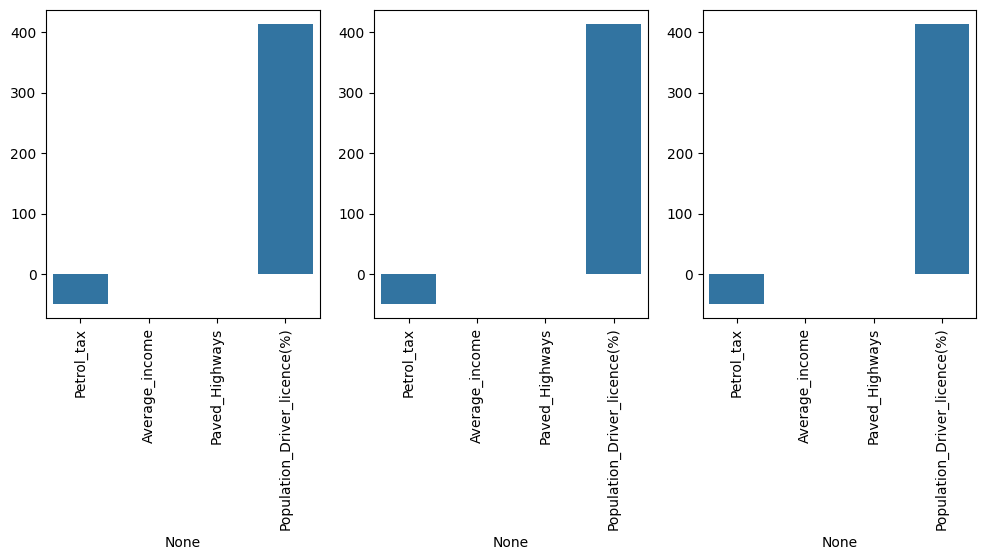

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, x in enumerate(results):
  ax = sns.barplot(x=X_train.columns, y=x[2], ax=axs[i])
  ax.tick_params(axis='x', rotation=90)

# ✅ Task
* We are obviously not limited to only a linear regression models for the regression tasks
    * Usually there is a regression alternative for most of the classification models in Sk-Learn
* Use [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) for the data and compare it to the Linear regression model
* Use [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) model
    * The model combines the L1 and L2 regularization
    * Study how the model works
    * The model has 2 important parameters `alpha` and `l1_ratio`
    * Try to tune them - i.e. try various combinations and plot the results (you can plot MAE or MSE for different `alpha` and `l1_ratio` values)
* Compare the `KNeighborsRegressor` and `ElasticNet` models - which of them was more precise?

Linear Regression MSE: 474.484
KNeighborsRegressor MSE: 1446.011


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.222e+04, tolerance: 3.194e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.515e+04, tolerance: 3.194e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Best ElasticNet MSE: 471.761 (alpha=0.022, l1_ratio=0.44)


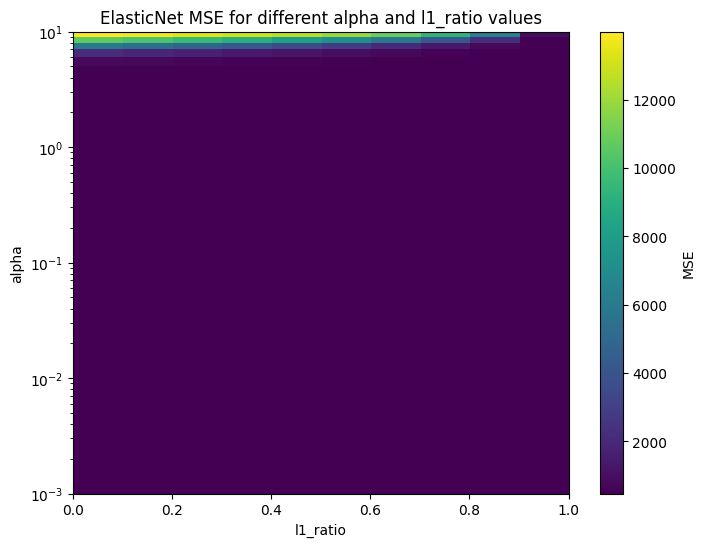


===== Model Comparison =====
Linear Regression MSE:  474.484
KNeighborsRegressor MSE: 1446.011
ElasticNet (tuned) MSE: 471.761

✅ Most precise model: ElasticNet


In [1]:
# ===============================
# Regression Model Comparison
# ===============================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1️⃣ Generate synthetic regression data
X, y = make_regression(n_samples=300, n_features=3, noise=25, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2️⃣ Train and evaluate Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin:.3f}")

# 3️⃣ Train and evaluate KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"KNeighborsRegressor MSE: {mse_knn:.3f}")

# 4️⃣ Tune ElasticNet parameters
alphas = np.logspace(-3, 1, 10)     # alpha values from 0.001 to 10
l1_ratios = np.linspace(0, 1, 10)   # l1_ratio values from 0 to 1
results = np.zeros((len(alphas), len(l1_ratios)))

for i, alpha in enumerate(alphas):
    for j, l1_ratio in enumerate(l1_ratios):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[i, j] = mean_squared_error(y_test, y_pred)

# 5️⃣ Find best parameters
best_idx = np.unravel_index(np.argmin(results), results.shape)
best_alpha = alphas[best_idx[0]]
best_l1_ratio = l1_ratios[best_idx[1]]
best_mse = results[best_idx]
print(f"Best ElasticNet MSE: {best_mse:.3f} (alpha={best_alpha:.3f}, l1_ratio={best_l1_ratio:.2f})")

# 6️⃣ Plot heatmap of results
plt.figure(figsize=(8, 6))
plt.imshow(results, origin='lower', aspect='auto', cmap='viridis',
           extent=[l1_ratios.min(), l1_ratios.max(), alphas.min(), alphas.max()])
plt.colorbar(label='MSE')
plt.xlabel('l1_ratio')
plt.ylabel('alpha')
plt.title('ElasticNet MSE for different alpha and l1_ratio values')
plt.yscale('log')
plt.show()

# 7️⃣ Compare all models
print("\n===== Model Comparison =====")
print(f"Linear Regression MSE:  {mse_lin:.3f}")
print(f"KNeighborsRegressor MSE: {mse_knn:.3f}")
print(f"ElasticNet (tuned) MSE: {best_mse:.3f}")

# Conclusion on precision
best_model_name = min(
    [("Linear Regression", mse_lin),
     ("KNeighborsRegressor", mse_knn),
     ("ElasticNet", best_mse)],
    key=lambda x: x[1]
)[0]

print(f"\n✅ Most precise model: {best_model_name}")
